#scene-adaptive

In [ ]:
pip install kagglehub opencv-python matplotlib

Path to dataset files: /kaggle/input/foggy-images

=== Dataset Structure Exploration ===
Root path: /kaggle/input/foggy-images
Items in root directory: ['IMG-20230220-WA0042.jpg', 'IMG-20230220-WA0049.jpg', 'IMG-20230220-WA0060.jpg', 'IMG-20230220-WA0037.jpg', 'IMG-20230220-WA0035.jpg', 'IMG-20230220-WA0058.jpg', 'IMG-20230220-WA0043.jpg', 'IMG-20230220-WA0048.jpg', 'IMG-20230220-WA0050.jpg', 'IMG-20230220-WA0028.jpg', 'IMG-20230220-WA0070.jpg', 'IMG-20230220-WA0066.jpg', 'IMG-20230220-WA0055.jpg', 'IMG-20230220-WA0045.jpg', 'IMG-20230220-WA0046.jpg', 'IMG-20230220-WA0034.jpg', 'IMG-20230220-WA0047.jpg', 'IMG-20230220-WA0033.jpg', 'IMG-20230220-WA0051.jpg', 'IMG-20230220-WA0039.jpg', 'IMG-20230220-WA0017.jpg', 'IMG-20230220-WA0036.jpg', 'IMG-20230220-WA0059.jpg', 'IMG-20230220-WA0054.jpg', 'IMG-20230220-WA0057.jpg', 'IMG-20230220-WA0053.jpg', 'IMG-20230220-WA0064.jpg', 'IMG-20230220-WA0068.jpg', 'IMG-20230220-WA0056.jpg', 'IMG-20230220-WA0038.jpg', 'IMG-20230220-WA0063.jpg', 'IMG-20230

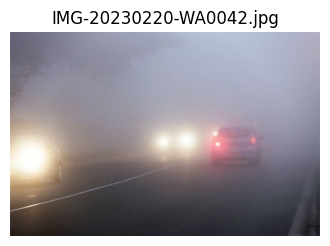

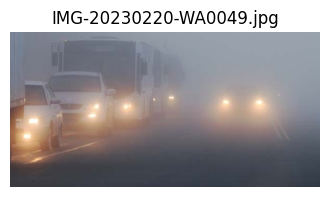

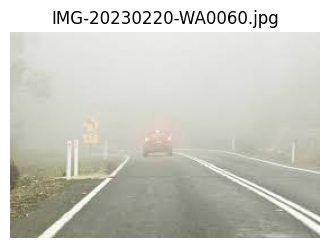

In [ ]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt

print("Downloading dataset...")
path = kagglehub.dataset_download("sanghavig/foggy-images")
print("Path to dataset files:", path)

def explore_dataset(path):
    """Explore and understand the dataset structure"""
    print("\n=== Dataset Structure Exploration ===")
    print(f"Root path: {path}")

    if not os.path.exists(path):
        print("ERROR: Dataset path does not exist!")
        return None

    items = os.listdir(path)
    print(f"Items in root directory: {items}")

    image_files = []
    subdirs = []
    all_images = []

    for item in items:
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            subdirs.append(item)
            try:
                sub_items = os.listdir(item_path)
                sub_images = [os.path.join(item_path, f) for f in sub_items
                              if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
                if sub_images:
                    all_images.extend(sub_images)
                    print(f"  Subdirectory '{item}' contains {len(sub_images)} image files")
                    print(f"    Sample files: {[os.path.basename(f) for f in sub_images[:3]]}")
            except Exception as e:
                print(f"    Could not access subdirectory '{item}': {e}")
        elif item.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            full_path = os.path.join(path, item)
            image_files.append(full_path)

    if image_files:
        print(f"Found {len(image_files)} image files in root directory")
        print(f"Sample files: {[os.path.basename(f) for f in image_files[:3]]}")
        all_images.extend(image_files)

    print(f"\nTotal images found: {len(all_images)}")
    return all_images

all_images = explore_dataset(path)

if all_images:
    print("\n=== Displaying Sample Images ===")
    for img_path in all_images[:3]:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
        plt.show()

In [ ]:
import numpy as np

def dark_channel(im, sz=15):
    b, g, r = cv2.split(im)
    min_img = cv2.min(cv2.min(r, g), b)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (sz, sz))
    dark = cv2.erode(min_img, kernel)
    return dark

def atmospheric_light(im, dark):
    h, w = im.shape[:2]
    num_pixels = h * w
    n_bright = int(max(num_pixels * 0.001, 1))
    dark_vec = dark.reshape(num_pixels)
    im_vec = im.reshape(num_pixels, 3)
    indices = dark_vec.argsort()[-n_bright:]
    atmo = np.mean(im_vec[indices], axis=0)
    return atmo

def transmission_estimate(im, A, omega=0.95, sz=15):
    im3 = im.astype(np.float32)
    normed = im3 / A
    transmission = 1 - omega * dark_channel(normed, sz)
    return transmission

def guided_filter(im, p, r, eps):
    return cv2.ximgproc.guidedFilter(guide=im, src=p, radius=r, eps=eps)

def recover_scene(im, A, t, t0=0.1):
    t = np.clip(t, t0, 1)
    J = (im - A) / t[:, :, None] + A
    return np.clip(J, 0, 255).astype(np.uint8)


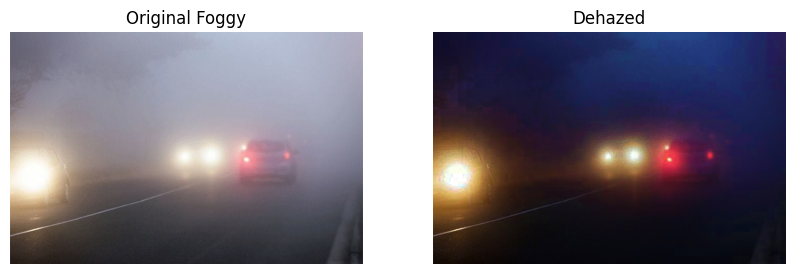

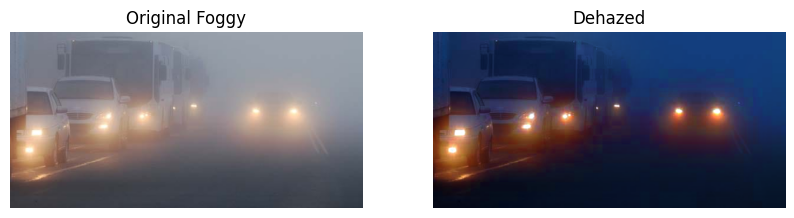

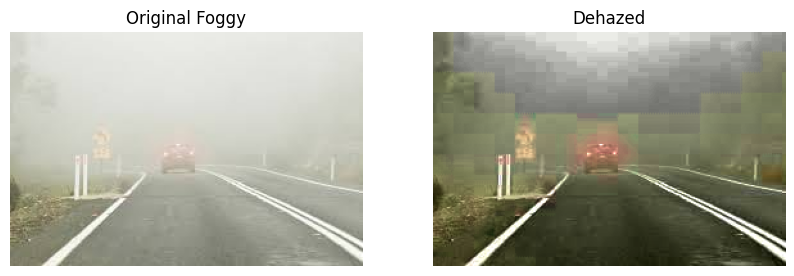

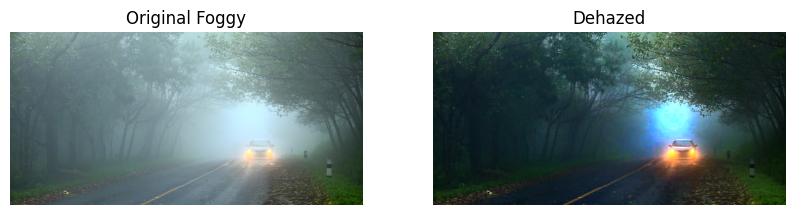

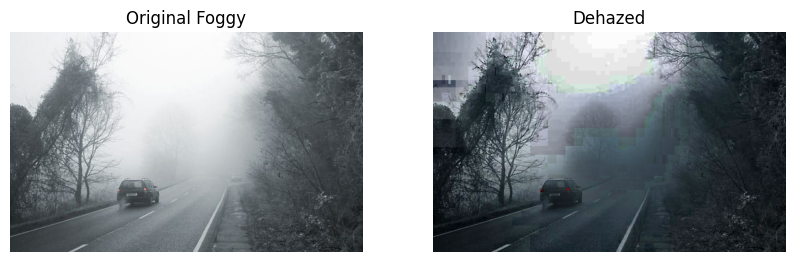

In [ ]:
for img_path in all_images[:5]:
    foggy = cv2.imread(img_path)
    foggy = cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB)

    dark = dark_channel(foggy)
    A = atmospheric_light(foggy, dark)
    t = transmission_estimate(foggy, A)

    t_refined = guided_filter(foggy, t.astype(np.float32), r=60, eps=1e-3)

    dehazed = recover_scene(foggy, A, t_refined)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Original Foggy")
    plt.imshow(foggy)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Dehazed")
    plt.imshow(dehazed)
    plt.axis('off')
    plt.show()


#ODCM

In [ ]:
pip install opencv-python matplotlib

100%|██████████| 831k/831k [00:00<00:00, 52.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sanghavig/foggy-images/versions/2

=== Dataset Structure Exploration ===
Root path: /root/.cache/kagglehub/datasets/sanghavig/foggy-images/versions/2
Items in root directory: ['IMG-20230220-WA0029.jpg', 'IMG-20230220-WA0057.jpg', 'IMG-20230220-WA0032.jpg', 'IMG-20230220-WA0018.jpg', 'IMG-20230220-WA0021.jpg', 'IMG-20230220-WA0041.jpg', 'IMG-20230220-WA0036.jpg', 'IMG-20230220-WA0061.jpg', 'IMG-20230220-WA0068.jpg', 'IMG-20230220-WA0064.jpg', 'IMG-20230220-WA0043.jpg', 'IMG-20230220-WA0054.jpg', 'IMG-20230220-WA0062.jpg', 'IMG-20230220-WA0051.jpg', 'IMG-20230220-WA0063.jpg', 'IMG-20230220-WA0055.jpg', 'IMG-20230220-WA0045.jpg', 'IMG-20230220-WA0034.jpg', 'IMG-20230220-WA0019.jpg', 'IMG-20230220-WA0070.jpg', 'IMG-20230220-WA0020.jpg', 'IMG-20230220-WA0053.jpg', 'IMG-20230220-WA0037.jpg', 'IMG-20230220-WA0044.jpg', 'IMG-20230220-WA0017.jpg', 'IMG-20230220-WA0050.jpg', 'IMG-20230220-WA0046.jpg', 'IMG-20230220-WA0042

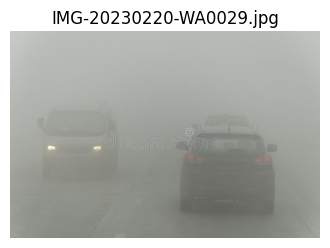

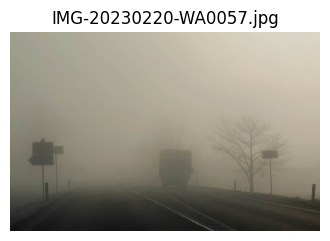

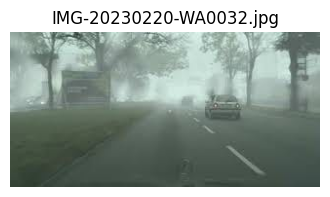

In [ ]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt

print("Downloading dataset...")
path = kagglehub.dataset_download("sanghavig/foggy-images")
print("Path to dataset files:", path)

def explore_dataset(path):
    """Explore and understand the dataset structure"""
    print("\n=== Dataset Structure Exploration ===")
    print(f"Root path: {path}")

    if not os.path.exists(path):
        print("ERROR: Dataset path does not exist!")
        return None

    items = os.listdir(path)
    print(f"Items in root directory: {items}")

    image_files = []
    subdirs = []
    all_images = []

    for item in items:
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            subdirs.append(item)
            try:
                sub_items = os.listdir(item_path)
                sub_images = [os.path.join(item_path, f) for f in sub_items
                              if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
                if sub_images:
                    all_images.extend(sub_images)
                    print(f"  Subdirectory '{item}' contains {len(sub_images)} image files")
                    print(f"    Sample files: {[os.path.basename(f) for f in sub_images[:3]]}")
            except Exception as e:
                print(f"    Could not access subdirectory '{item}': {e}")
        elif item.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            full_path = os.path.join(path, item)
            image_files.append(full_path)

    if image_files:
        print(f"Found {len(image_files)} image files in root directory")
        print(f"Sample files: {[os.path.basename(f) for f in image_files[:3]]}")
        all_images.extend(image_files)

    print(f"\nTotal images found: {len(all_images)}")
    return all_images

all_images = explore_dataset(path)

if all_images:
    print("\n=== Displaying Sample Images ===")
    for img_path in all_images[:3]:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
        plt.show()


=== Running ODCM on Sample Images ===


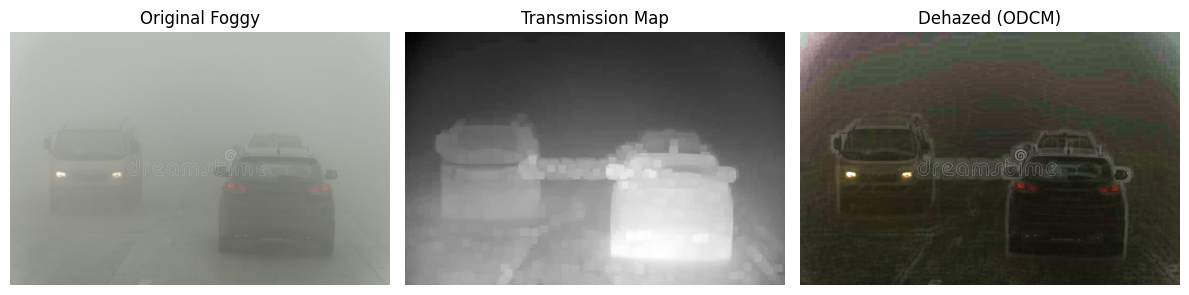

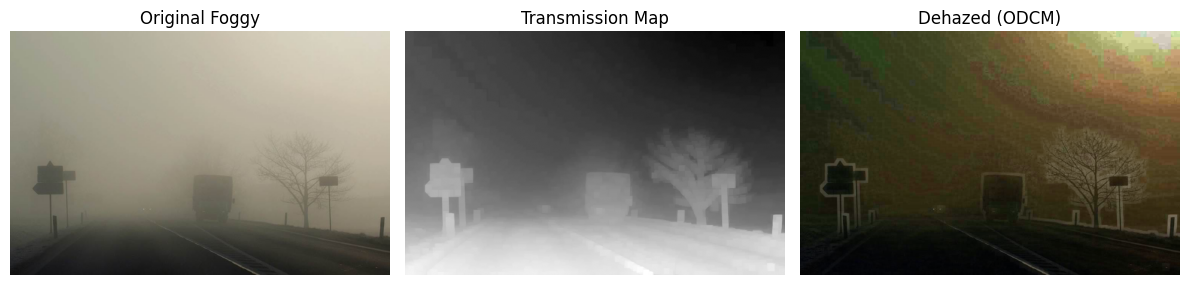

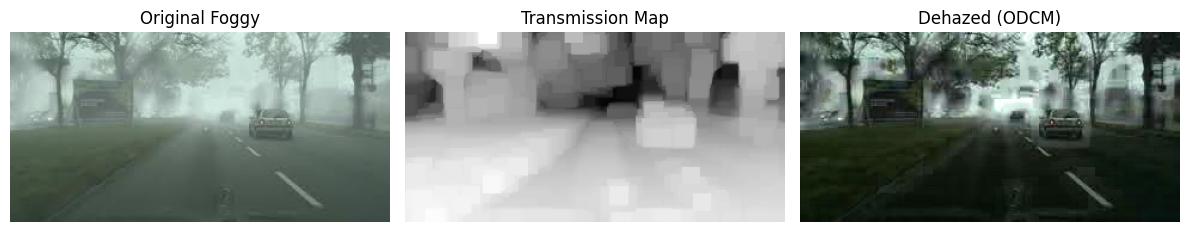

In [ ]:
import numpy as np

def get_dark_channel(image, patch_size=15):
    """Get the dark channel prior with morphological opening."""
    min_channel = np.min(image, axis=2)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (patch_size, patch_size))

    # Morphological opening before erosion
    opened = cv2.morphologyEx(min_channel, cv2.MORPH_OPEN, kernel)
    dark_channel = cv2.erode(opened, kernel)
    return dark_channel

def estimate_atmospheric_light(image, dark_channel):
    """Estimate the global atmospheric light."""
    h, w = image.shape[:2]
    flat_img = image.reshape(-1, 3)
    flat_dark = dark_channel.ravel()

    num_brightest = max(int(h * w * 0.001), 1)
    indices = np.argsort(flat_dark)[-num_brightest:]
    atmo_light = np.mean(flat_img[indices], axis=0)
    return atmo_light

def estimate_transmission(image, atmo_light, omega=0.95, patch_size=15):
    """Estimate the transmission map."""
    normed = image.astype(np.float32) / atmo_light
    dark_channel = get_dark_channel(normed, patch_size)
    transmission = 1 - omega * dark_channel
    return transmission

def recover_image(image, atmo_light, transmission, t0=0.1):
    """Recover the scene radiance (dehazed image)."""
    transmission = np.clip(transmission, t0, 1)
    J = (image.astype(np.float32) - atmo_light) / transmission[..., np.newaxis] + atmo_light
    return np.clip(J, 0, 255).astype(np.uint8)

# Apply ODCM on sample images
print("\n=== Running ODCM on Sample Images ===")
for img_path in all_images[:3]:
    # Load and prepare image
    foggy = cv2.imread(img_path)
    foggy = cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB)

    dark = get_dark_channel(foggy)
    A = estimate_atmospheric_light(foggy, dark)
    t = estimate_transmission(foggy, A)
    J = recover_image(foggy, A, t)

    # Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(foggy)
    plt.title("Original Foggy")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(t, cmap='gray')
    plt.title("Transmission Map")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(J)
    plt.title("Dehazed (ODCM)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


#CLAHE

Path to dataset files: /kaggle/input/foggy-images

=== Dataset Structure Exploration ===
Root path: /kaggle/input/foggy-images
Items in root directory: ['IMG-20230220-WA0042.jpg', 'IMG-20230220-WA0049.jpg', 'IMG-20230220-WA0060.jpg', 'IMG-20230220-WA0037.jpg', 'IMG-20230220-WA0035.jpg', 'IMG-20230220-WA0058.jpg', 'IMG-20230220-WA0043.jpg', 'IMG-20230220-WA0048.jpg', 'IMG-20230220-WA0050.jpg', 'IMG-20230220-WA0028.jpg', 'IMG-20230220-WA0070.jpg', 'IMG-20230220-WA0066.jpg', 'IMG-20230220-WA0055.jpg', 'IMG-20230220-WA0045.jpg', 'IMG-20230220-WA0046.jpg', 'IMG-20230220-WA0034.jpg', 'IMG-20230220-WA0047.jpg', 'IMG-20230220-WA0033.jpg', 'IMG-20230220-WA0051.jpg', 'IMG-20230220-WA0039.jpg', 'IMG-20230220-WA0017.jpg', 'IMG-20230220-WA0036.jpg', 'IMG-20230220-WA0059.jpg', 'IMG-20230220-WA0054.jpg', 'IMG-20230220-WA0057.jpg', 'IMG-20230220-WA0053.jpg', 'IMG-20230220-WA0064.jpg', 'IMG-20230220-WA0068.jpg', 'IMG-20230220-WA0056.jpg', 'IMG-20230220-WA0038.jpg', 'IMG-20230220-WA0063.jpg', 'IMG-20230

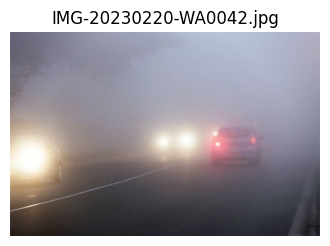

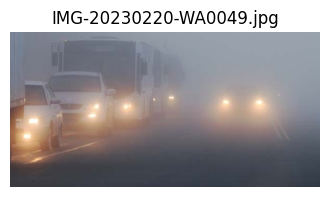

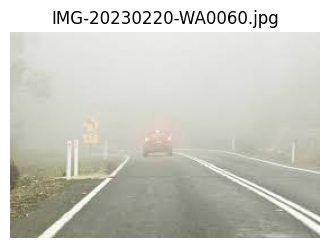

In [ ]:
import kagglehub
import os
import cv2
import matplotlib.pyplot as plt

print("Downloading dataset...")
path = kagglehub.dataset_download("sanghavig/foggy-images")
print("Path to dataset files:", path)

def explore_dataset(path):
    """Explore and understand the dataset structure"""
    print("\n=== Dataset Structure Exploration ===")
    print(f"Root path: {path}")

    if not os.path.exists(path):
        print("ERROR: Dataset path does not exist!")
        return None

    items = os.listdir(path)
    print(f"Items in root directory: {items}")

    image_files = []
    subdirs = []
    all_images = []

    for item in items:
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            subdirs.append(item)
            try:
                sub_items = os.listdir(item_path)
                sub_images = [os.path.join(item_path, f) for f in sub_items
                              if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
                if sub_images:
                    all_images.extend(sub_images)
                    print(f"  Subdirectory '{item}' contains {len(sub_images)} image files")
                    print(f"    Sample files: {[os.path.basename(f) for f in sub_images[:3]]}")
            except Exception as e:
                print(f"    Could not access subdirectory '{item}': {e}")
        elif item.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            full_path = os.path.join(path, item)
            image_files.append(full_path)

    if image_files:
        print(f"Found {len(image_files)} image files in root directory")
        print(f"Sample files: {[os.path.basename(f) for f in image_files[:3]]}")
        all_images.extend(image_files)

    print(f"\nTotal images found: {len(all_images)}")
    return all_images

all_images = explore_dataset(path)

if all_images:
    print("\n=== Displaying Sample Images ===")
    for img_path in all_images[:3]:
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(os.path.basename(img_path))
        plt.axis('off')
        plt.show()


=== Running CLAHE on Sample Images ===


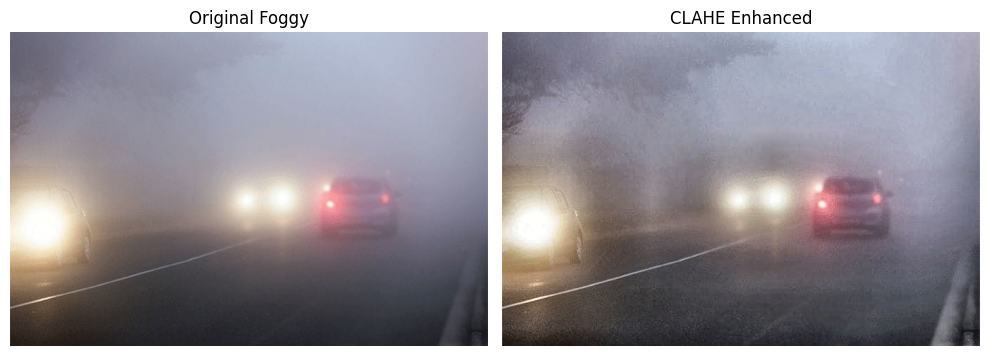

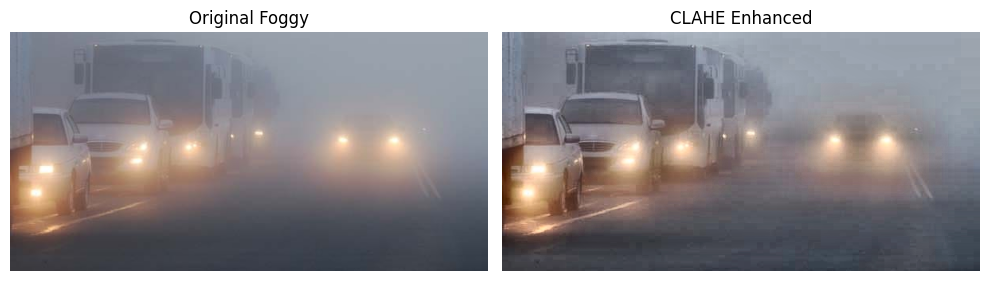

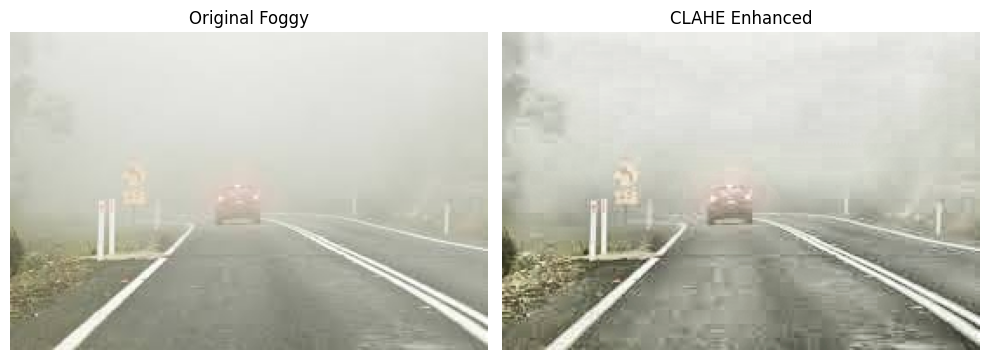

In [ ]:
def apply_CLAHE_rgb(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """Apply CLAHE to the L-channel in LAB color space for better contrast enhancement."""
    # Convert RGB to LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE to L-channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    cl = clahe.apply(l)

    # Merge channels and convert back to RGB
    limg = cv2.merge((cl, a, b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    return final

# Apply CLAHE on a few sample images
print("\n=== Running CLAHE on Sample Images ===")
for img_path in all_images[:3]:
    # Load image and convert to RGB
    foggy = cv2.imread(img_path)
    foggy = cv2.cvtColor(foggy, cv2.COLOR_BGR2RGB)

    # Apply CLAHE
    clahe_result = apply_CLAHE_rgb(foggy)

    # Display original and enhanced
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(foggy)
    plt.title("Original Foggy")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(clahe_result)
    plt.title("CLAHE Enhanced")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
